In [1]:
 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input/chest_xray/chest_xray/train"))

# Any results you write to the current directory are saved as output.

['NORMAL', '.DS_Store', 'PNEUMONIA']


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_data_dir = '../input/chest_xray/chest_xray/train'
validation_data_dir = '../input/chest_xray/chest_xray/val'
test_data_dir = '../input/chest_xray/chest_xray/test'


In [4]:
import cv2
img=cv2.imread('../input/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')

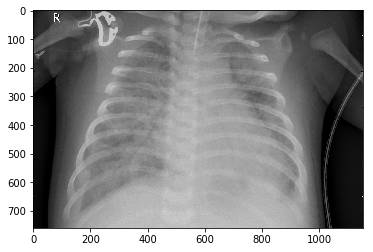

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img);

In [32]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [33]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='binary')


Found 16 images belonging to 2 classes.


In [34]:
test_generator=test_datagen.flow_from_directory(test_data_dir,target_size=(150,150),batch_size=16,class_mode='binary')

Found 624 images belonging to 2 classes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dropout,Dense,MaxPooling2D

In [40]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.input_shape,model.output_shape)

(None, 150, 150, 3) (None, 1)


In [41]:
model.fit_generator(train_generator,epochs=50,validation_data=validation_generator,validation_steps=16)

Epoch 1/50
326/326 [==============================] - 90s 276ms/step - loss: 0.4077 - acc: 0.8234 - val_loss: 0.7366 - val_acc: 0.5625
Epoch 2/50
326/326 [==============================] - 91s 280ms/step - loss: 0.2776 - acc: 0.8817 - val_loss: 0.8984 - val_acc: 0.5000
Epoch 3/50
326/326 [==============================] - 91s 279ms/step - loss: 0.2382 - acc: 0.9003 - val_loss: 0.5882 - val_acc: 0.7500
Epoch 4/50
326/326 [==============================] - 90s 276ms/step - loss: 0.2345 - acc: 0.9034 - val_loss: 0.7742 - val_acc: 0.6250
Epoch 5/50
326/326 [==============================] - 91s 280ms/step - loss: 0.1964 - acc: 0.9273 - val_loss: 0.7184 - val_acc: 0.6250
Epoch 6/50
326/326 [==============================] - 91s 279ms/step - loss: 0.1984 - acc: 0.9224 - val_loss: 0.6760 - val_acc: 0.6250
Epoch 7/50
326/326 [==============================] - 89s 274ms/step - loss: 0.1926 - acc: 0.9270 - val_loss: 1.1194 - val_acc: 0.5625
Epoch 8/50
326/326 [==============================] - 9

Epoch 39/50
326/326 [==============================] - 94s 287ms/step - loss: 0.1167 - acc: 0.9572 - val_loss: 0.7592 - val_acc: 0.7500
Epoch 40/50
326/326 [==============================] - 93s 285ms/step - loss: 0.1118 - acc: 0.9561 - val_loss: 0.6525 - val_acc: 0.6875
Epoch 41/50
326/326 [==============================] - 91s 281ms/step - loss: 0.1197 - acc: 0.9528 - val_loss: 0.7990 - val_acc: 0.6250
Epoch 42/50
326/326 [==============================] - 92s 282ms/step - loss: 0.1127 - acc: 0.9559 - val_loss: 0.8181 - val_acc: 0.7500
Epoch 43/50
326/326 [==============================] - 90s 276ms/step - loss: 0.1221 - acc: 0.9540 - val_loss: 0.7056 - val_acc: 0.7500
Epoch 44/50
326/326 [==============================] - 91s 279ms/step - loss: 0.1207 - acc: 0.9519 - val_loss: 1.0876 - val_acc: 0.6250
Epoch 45/50
326/326 [==============================] - 92s 283ms/step - loss: 0.1152 - acc: 0.9526 - val_loss: 0.8354 - val_acc: 0.7500
Epoch 46/50
326/326 [===========================

In [42]:
scores=model.evaluate_generator(test_generator)

In [46]:
print(model.metrics_names[1],scores[1]*100,'%')

acc 87.33974099159241 %
